51.6°

Baïkonour : 45.96°

In [59]:
import isslib
df = isslib.ISS_Position().get_data()

In [60]:
import numpy as np
r = np.sqrt(df.x**2 + df.y**2 + df.z**2)
earth_mean_radius = 6371
df['altitude'] = r - earth_mean_radius
df.set_index('datetime', inplace=True)

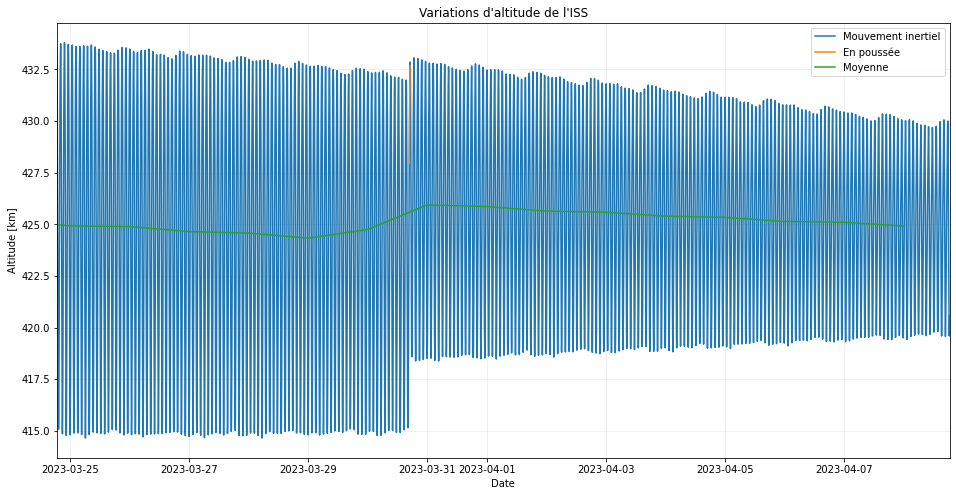

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(df.query('~on_thrust')['altitude'], label="Mouvement inertiel")
plt.plot(df.query('on_thrust')['altitude'], label="En poussée")
plt.plot(df.query('~on_thrust').groupby(df.query('~on_thrust').index.date).mean()['altitude'], label='Moyenne')
plt.title("Variations d'altitude de l'ISS")
plt.xlabel("Date")
plt.ylabel("Altitude [km]")
plt.grid(alpha=.25)
plt.xlim(df.index.min(), df.index.max())
plt.legend()
plt.show()


In [62]:
df['altitude'].min(), df['altitude'].max()

(414.64685905554506, 433.79542005134317)

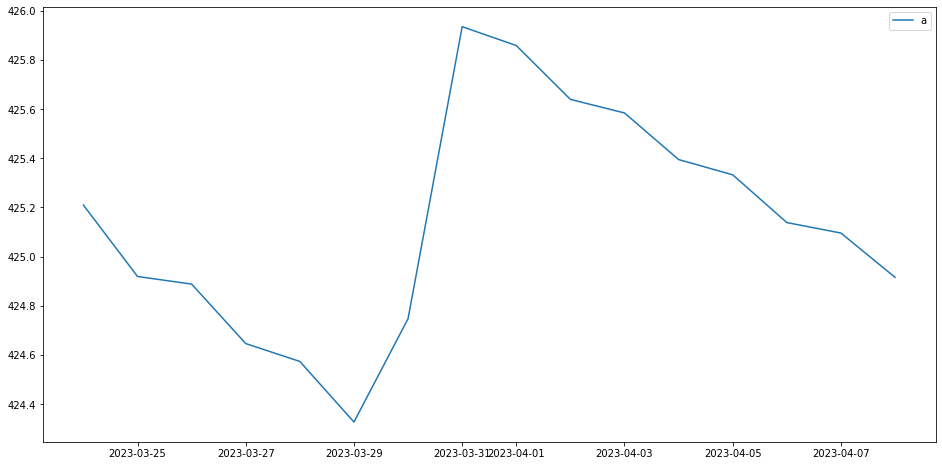

In [81]:
plt.figure(figsize=(16,8))
plt.plot(df.query('~on_thrust').groupby(df.query('~on_thrust').index.date).mean()['altitude'], label='a')
plt.legend()
plt.show()